# <font color="Brown">Blood Donation Prediction Model </font>
Made By Ethan Thomas D'Mello
Project ID:

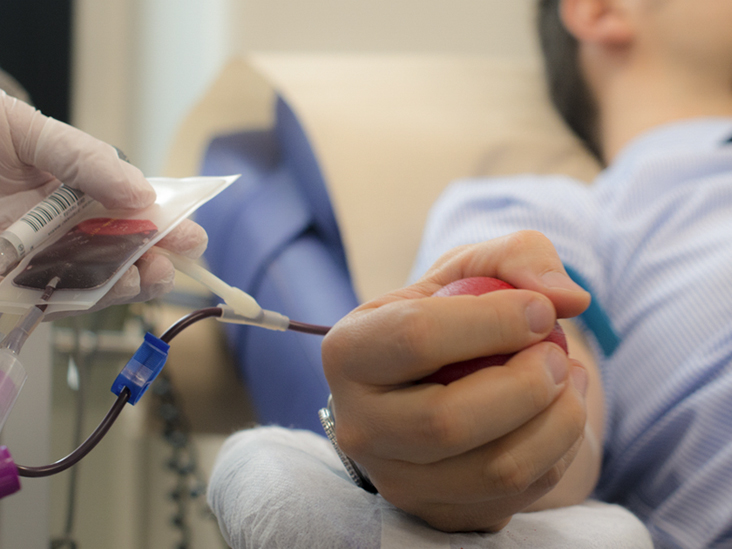

# Predicting if a person will donate blood using Machine Learning.
 This notebook details various python-based ML and data science libraries in an attempt to build a model which will be able to confidently predict if a person will donate within a period of time.

The following pipeline will be followed :
- Problem Definition
- Data 
- Evaluvation 
- Features 
- Modelling 
- Experimentation

### Problem Definition
In a statement,
> With the following Parameters, can we efficiently predict if a possible donator will donate their blood ?

### Data
The Data provided by Datamites:

https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1011-BloodDonaPred.zip

Using both Training and Testing Data.



### Evaluvation
> If we can predict the target variable ( whether if the person will donate or not ) with an accuracy of 95% , we will persue the project.


### Features
Various features will be identified and detailed 

#### Create data dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.


1. **Unnamed**: No name is given but it represents a unique 'int' value corresponding to the donors ID.
2. **Months since Last Donation**: this is the number of monthis since this donor's most recent donation.
3. **Number of Donations**: this is the total number of donations that the donor has made.
4. **Total Volume Donated**: this is the total amound of blood that the donor has donated in cubuc centimeters.
5. **Months since First Donation**: this is the number of months since the donor's first donation.

## <font color="brown">Preparing the tools <font>
we're going to use several libraries to aid our model, some of them are listed below:


In [2755]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score


In [2756]:
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### <font color='brown'>Data Exploration<font>
The goal here is to find more about data and become a subject matter export on the dataset you're working with.

- What question(s) are you going to solve?
- What kind of data do we have ans how do we treat different types?
- What's missing from the data and how do you deal with it? 
- Where are the outliers and why should you care about them?   
- How can you add, change or remove features to get more out of you data?
    

In [2757]:
#checking first five rows
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [2758]:
#checking last five rows
df.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [2759]:
df['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [2760]:
#checking the info and describe functions 
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [2761]:
# Are there any missing values?
df.isna().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

### Renaming the data and dropping unwanted columns

In [2762]:
df.rename(columns={'Months since Last Donation': 'msld',
                   'Number of Donations':'nod' ,
                   'Total Volume Donated (c.c.)':'tvd',
                   'Months since First Donation':'msfd',
                   'Made Donation in March 2007':'target'}, inplace = True )
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [2763]:
df.head()

,msld,nod,tvd,msfd,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Exploratory Data Analysis
We will Perform Two Types of Analysis.
- Univariate 
- Bivariate

## <font color=brown> Univariate Analysis <font>
We will do Data Visualization to check the data

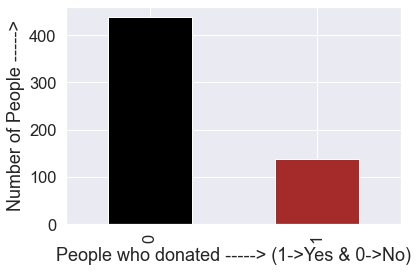

In [2764]:
#analysing the number of people who donated
df.target.value_counts().plot( kind='bar', color=['black','brown']);
plt.xlabel('People who donated -----> (1->Yes & 0->No)');
plt.ylabel('Number of People ----->');

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


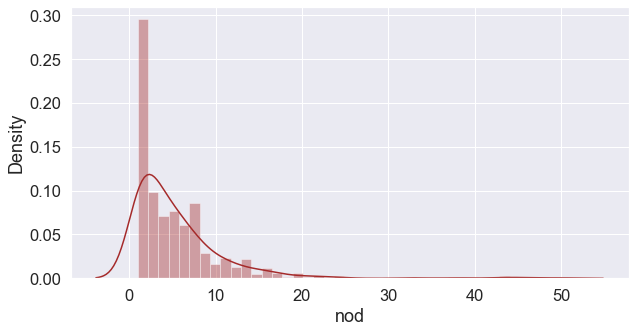

In [2765]:
plt.figure(figsize = (10,5))
sns.distplot(df.nod.dropna(axis=0),color='brown')
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


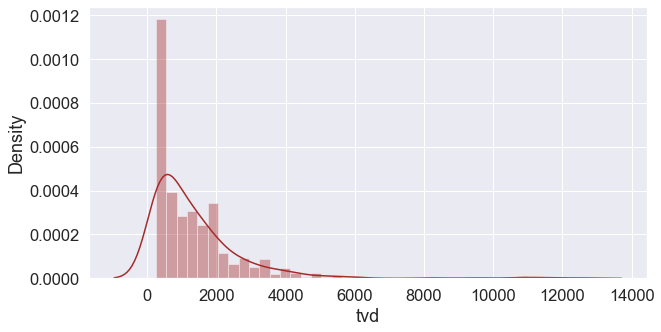

In [2766]:
plt.figure(figsize = (10,5))
sns.distplot(df.tvd.dropna(axis=0),color='brown')
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ethan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ethan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

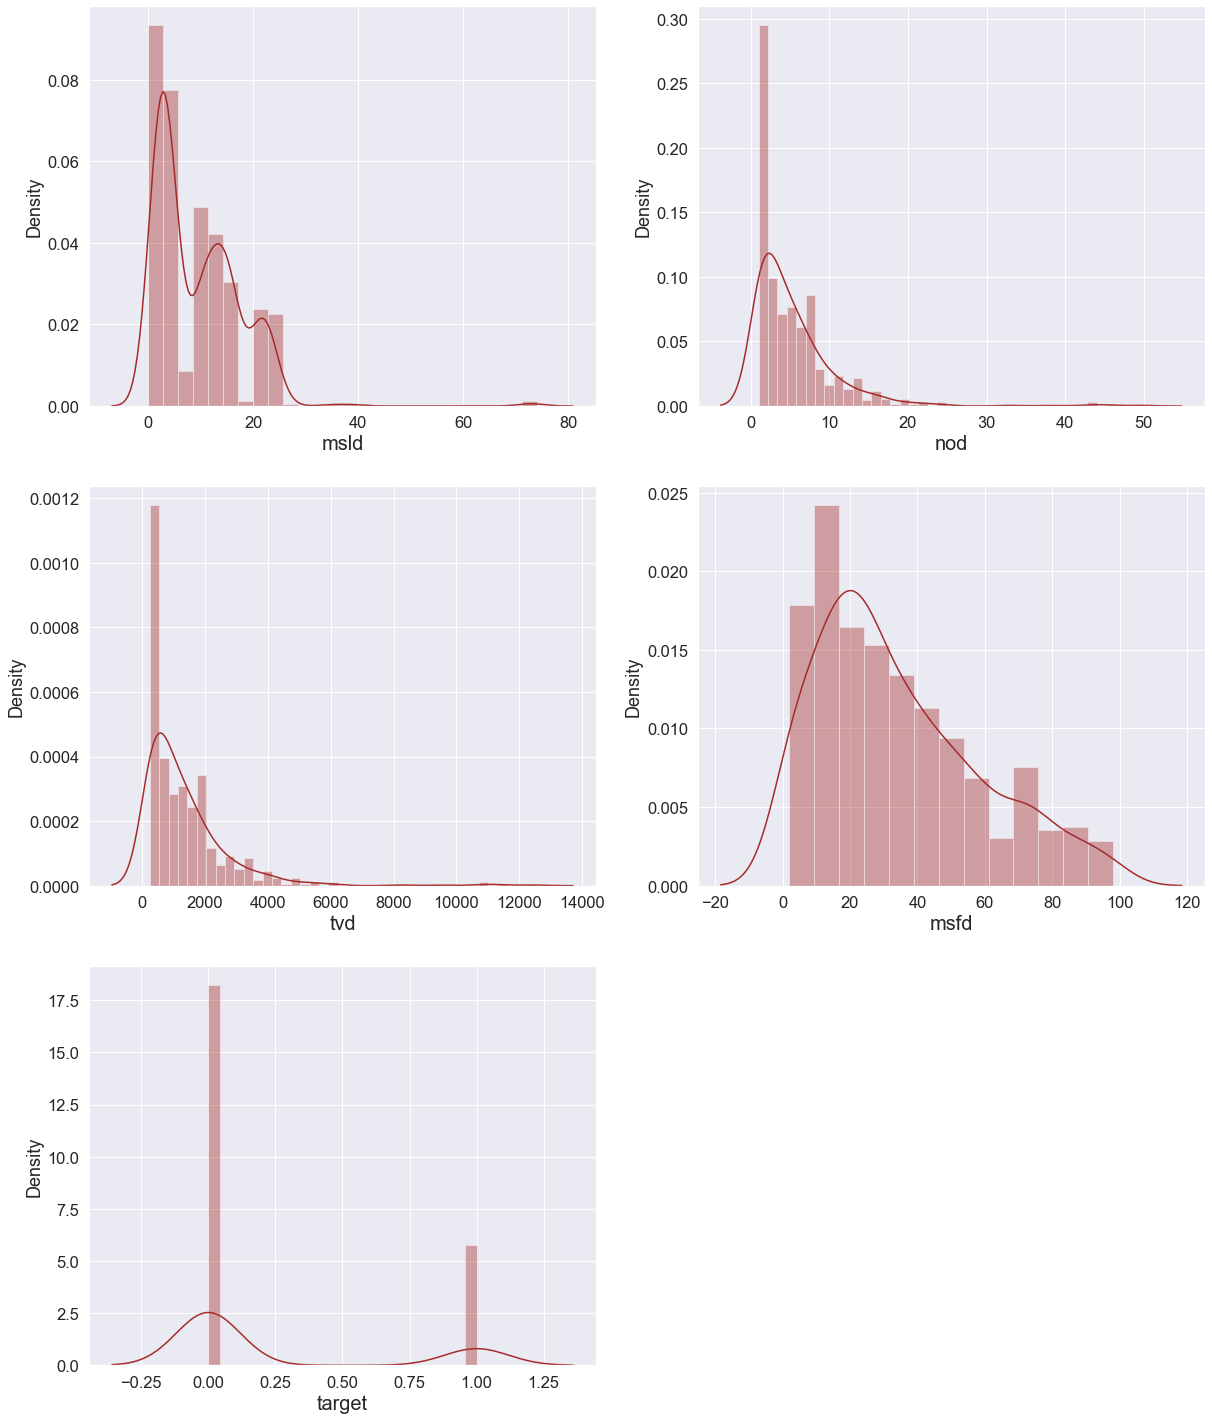

In [2767]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1


for column in df:
    if plotnumber<=5 :     # as there are 9 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'brown')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can see from the graphs that there is some skewness in the data.

## <font color=brown> Bivariate Analysis <font>
We will check the heatmap for the types of correlation.
There are two types of correlation :
- Positive Correlation.
- Negative Correlation.

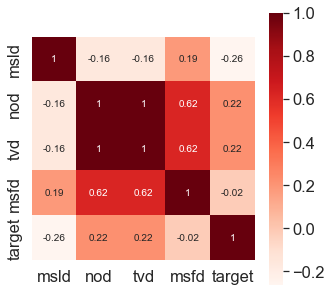

In [2768]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True  ) 
plt.show()

## The positve correlation:
- Month since last donated:   Month since first donated
- Number of Donations:   Month since first donated ,   Made donation in March 2007
- Total Volume Donated:   Month since first donated ,   Made donation in March 2007
- Month since first donated:    Number of Donations ,   Total Volume Donated

## The Negative correlation:
- Month since last donated:   Number of Donations,   Total Volume Donated ,   Made donation in March 2007
- Number of Donations:   Month since last donated
- Total Volume Donated:     Month since last donated
- Month since first donated: Made donation in March 2007

### Analysing Months since last donation with respect to Months since first donation.
We will compare the two data to check if it is a deciding variable in the prediction.

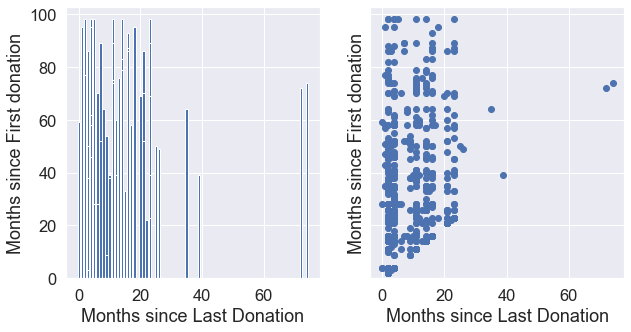

In [2769]:
fig, axs = plt.subplots(1,2,figsize=(10,5),sharey = True)

#first plot
axs[0].bar(df.msld, df.msfd)

axs[0].set_xlabel('Months since Last Donation')
axs[0].set_ylabel('Months since First donation')

#second plot
axs[1].scatter(df.msld, df.msfd)

axs[1].set_xlabel('Months since Last Donation')
axs[1].set_ylabel('Months since First donation')
plt.show()

### Analysing Number of donations and Total volume donated with respect to Month since first donated and Donation in March 2007

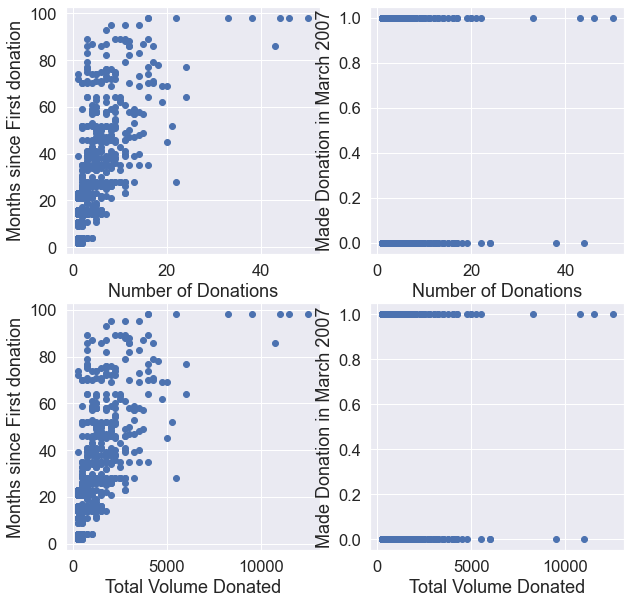

In [2770]:
fig , axs = plt.subplots(2,2, figsize=(10,10))

#subplot 1
axs[0][0].scatter(df.nod,df.msfd)
axs[0][1].scatter(df.nod,df.target)


for i in range(0,2) :
    axs[0][i].set_xlabel('Number of Donations')

axs[0][0].set_ylabel('Months since First donation')
axs[0][1].set_ylabel('Made Donation in March 2007')

#subplot 2
axs[1][0].scatter(df.tvd,df.msfd)
axs[1][1].scatter(df.tvd,df.target)


for i in range(0,2) :
    axs[1][i].set_xlabel('Total Volume Donated')

axs[1][0].set_ylabel('Months since First donation')
axs[1][1].set_ylabel('Made Donation in March 2007')

plt.show()

### Month Since last donation wrt number of Donations

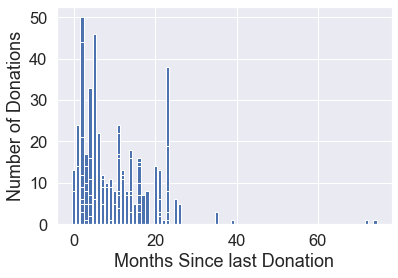

In [2771]:
plt.bar(df.msld, df.nod)
plt.xlabel('Months Since last Donation')
plt.ylabel('Number of Donations')
plt.show()

### Month since Last Donated and Volume Donated 

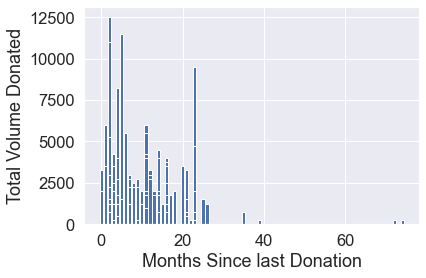

In [2772]:
plt.bar(df.msld, df.tvd)
plt.xlabel('Months Since last Donation')
plt.ylabel('Total Volume Donated')
plt.show()

### Month since Last Donated and Donation Made in March

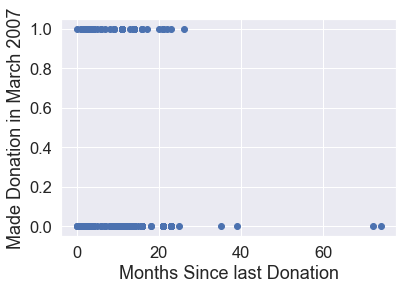

In [2773]:
plt.scatter(df.msld, df.target )
plt.xlabel('Months Since last Donation')
plt.ylabel('Made Donation in March 2007')
plt.show()

### Checking if there are duplicate rows

In [2774]:
#df.duplicated().sum()

In [2775]:
#df = df.drop_duplicates(keep = False)

In [2776]:
#df.duplicated().sum()

### Dealing with Outlieres
There are some outliers in the data we must deal with them by checking the boxplot using seaboarne

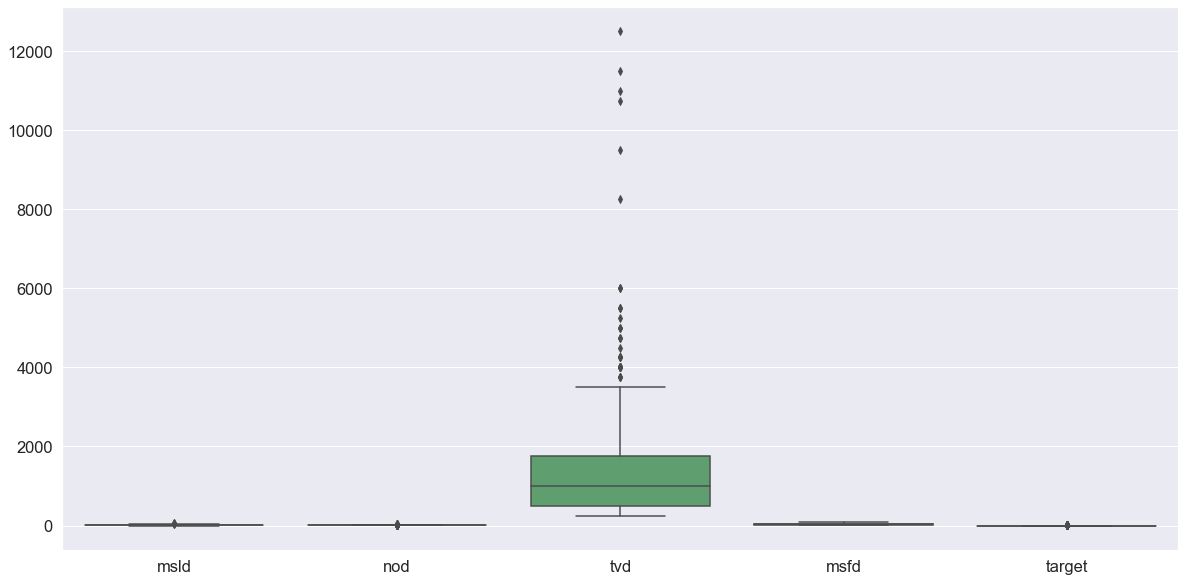

In [2777]:
fig , axs = plt.subplots(figsize =(20,10))
sns.boxplot(data = df, ax=axs )
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


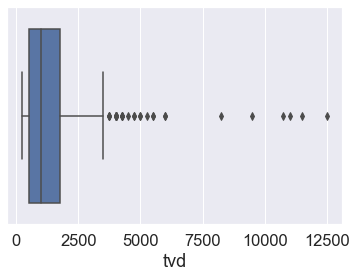

In [2778]:
sns.boxplot(df.tvd)
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


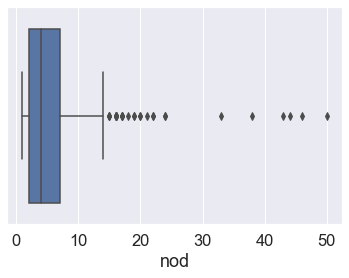

In [2779]:
sns.boxplot(df.nod)
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


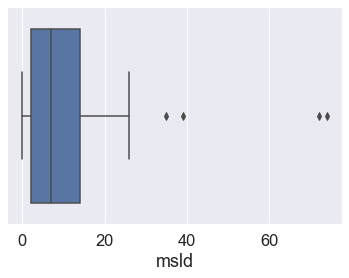

In [2780]:
sns.boxplot(df.msld)
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


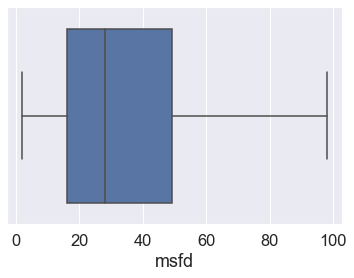

In [2781]:
sns.boxplot(df.msfd)
plt.show()

There are many outliers in the Total volume donated portion. We must remove them using IQR (Inter Quartile Range),
This is calculated by using upper bounds and lower bounds whose formulas are defined as :
- Lower bound: (Q1-1.5*IQR)
- Upper bound: (Q3+1.5*IQR)
- IQR = Q3 - Q1, where Q1 and Q3 represent the 25th and 75th Percentile respectfully

### For Total volume donated Outliers

In [2782]:
# Interquartile range (IQR) 
from scipy import stats
IQR = stats.iqr(df.tvd, interpolation = 'midpoint') 
## min and max limit calculation
# First quartile (Q1) 
Q1 = df.tvd.quantile(0.25)
# Third quartile (Q3) 
Q3 =df.tvd.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [2783]:
min_limit

-1375.0

In [2784]:
df.loc[df['tvd'] > max_limit]

,msld,nod,tvd,msfd,target
0,2,50,12500,98,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
8,5,46,11500,98,1
15,2,15,3750,49,1
28,2,16,4000,64,0
37,4,20,5000,69,1
47,4,19,4750,69,1
53,3,16,4000,74,0


In [2785]:
df.loc[df['tvd'] > max_limit, 'tvd']=np.median(df.tvd) #median(df.tvd) , nan

In [2786]:
df=df.dropna(axis=0)
df.isnull().sum()

msld      0
nod       0
tvd       0
msfd      0
target    0
dtype: int64

We can see that we still have outliers in our tvd data and we must repeat the process to get rid of them 

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


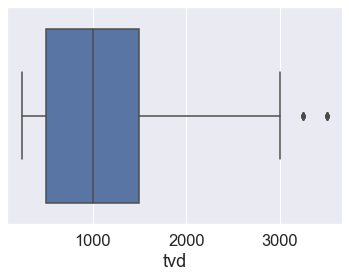

In [2787]:
sns.boxplot(df.tvd)
plt.show()

In [2788]:
IQR = stats.iqr(df.tvd, interpolation = 'midpoint') 
Q1 = df.tvd.quantile(0.25) 
Q3 =df.tvd.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [2789]:
df.loc[df['tvd'] > max_limit]

,msld,nod,tvd,msfd,target
1,0,13,3250.0,28,1
11,1,13,3250.0,47,0
14,2,14,3500.0,48,1
22,4,14,3500.0,40,0
25,1,14,3500.0,58,0
33,2,13,3250.0,53,1
199,12,13,3250.0,59,0
206,11,14,3500.0,73,1
218,14,13,3250.0,57,0
278,21,13,3250.0,57,0


In [2790]:
df.loc[df['tvd'] > max_limit, 'tvd' ]=np.median(df.tvd) #median(df.tvd) , nan
df=df.dropna(axis=0)
df.isnull().sum()

msld      0
nod       0
tvd       0
msfd      0
target    0
dtype: int64

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


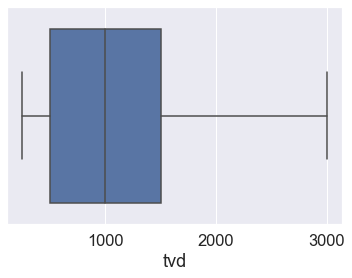

In [2791]:
sns.boxplot(df.tvd)
plt.show()

### For Number of Donations Outliers

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


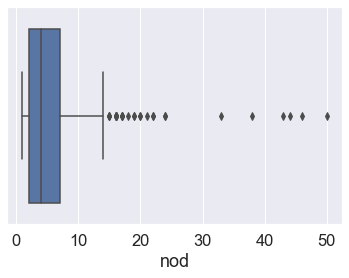

In [2792]:
sns.boxplot(df.nod)
plt.show()

In [2793]:
IQR = stats.iqr(df.nod, interpolation = 'midpoint') 
Q1 = df.nod.quantile(0.25) 
Q3 =df.nod.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR
df.loc[df['nod'] > max_limit]

,msld,nod,tvd,msfd,target
0,2,50,1000.0,98,1
2,1,16,1000.0,35,1
3,2,20,1000.0,45,1
4,1,24,1000.0,77,0
8,5,46,1000.0,98,1
15,2,15,1000.0,49,1
28,2,16,1000.0,64,0
37,4,20,1000.0,69,1
47,4,19,1000.0,69,1
53,3,16,1000.0,74,0


C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


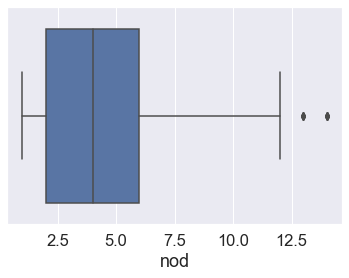

In [2794]:
#FIRST TIME
df.loc[df['nod'] > max_limit, 'nod']= np.median(df.nod)
sns.boxplot(df.nod)
plt.show()

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


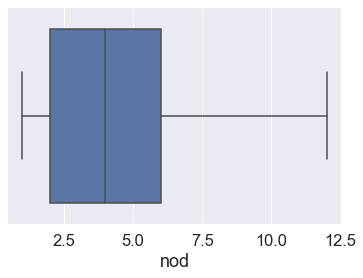

In [2795]:
#SECOND TIME
IQR = stats.iqr(df.nod, interpolation = 'midpoint') 
Q1 = df.nod.quantile(0.25) 
Q3 =df.nod.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR
df.loc[df['nod'] > max_limit, 'nod']= np.median(df.nod)
sns.boxplot(df.nod)
plt.show()

For the rest of the data we can use a for Loop 

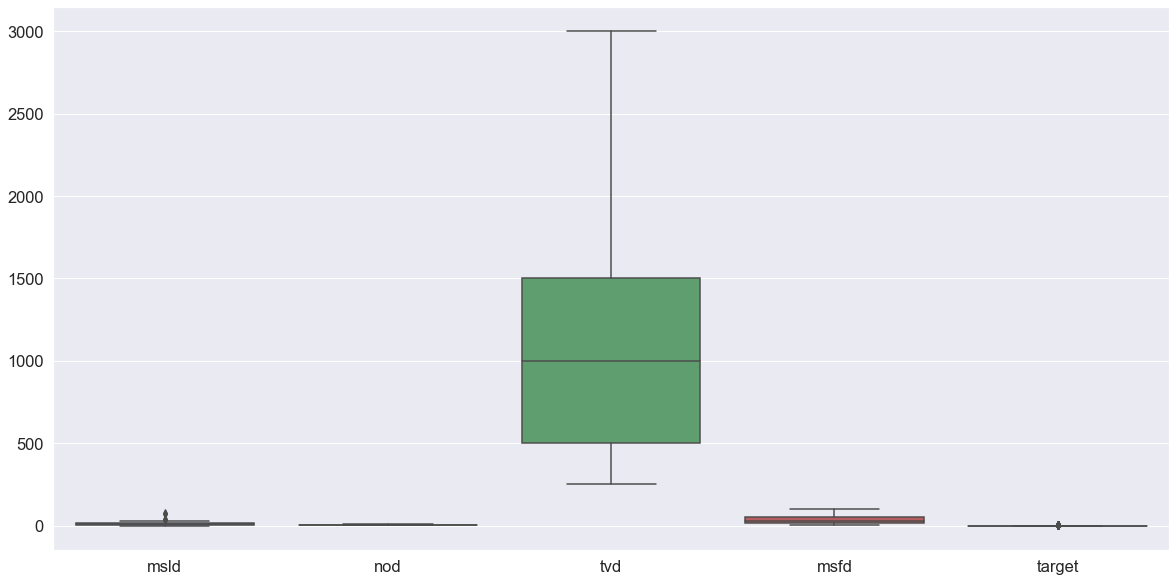

In [2796]:
col=['msld','msfd']
for list in col:
    IQR = stats.iqr(df[list], interpolation = 'midpoint') 
    Q1 = df[list].quantile(0.25) 
    Q3 =df[list].quantile(0.75)
    min_limit=Q1 - 1.5*IQR
    max_limit=Q3 +1.5*IQR
    df.loc[df[list] > max_limit, 'nod']= np.median(df[list])
fig , axs = plt.subplots(figsize =(20,10))
sns.boxplot(data = df, ax=axs )
plt.show()
    

Looks like we still have outliersin msld , we will use the IQR again to deal with it 

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


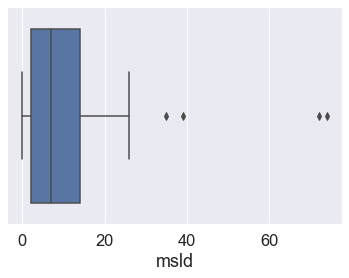

In [2797]:
sns.boxplot(df.msld)

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


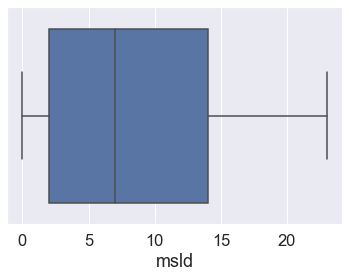

In [2798]:
IQR = stats.iqr(df.msld, interpolation = 'midpoint') 
Q1 = df.nod.quantile(0.25) 
Q3 =df.nod.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR
df.loc[df['msld'] > max_limit, 'msld']= np.median(df.msld)
sns.boxplot(df.msld)
plt.show()

## Now all the outliers have been dealt with we can continue to :



## <font color='Brown' > Modelling <font>

### Setting up Training and testing Data
Training data is setup, Testing Data Needs to be setup:

In [2799]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.3,random_state = 42)

### Let us compare the Different  Machine Learning Models

In [2800]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [2801]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train = y_train,
                             y_test = y_test)

In [2802]:
model_scores

{'Logistic Regression': 0.7456647398843931,
 'KNN': 0.7687861271676301,
 'Random Forest': 0.7341040462427746}

<Figure size 720x360 with 0 Axes>

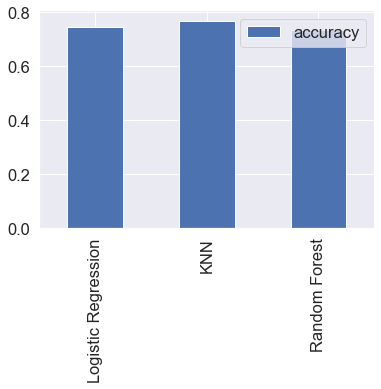

In [2803]:
plt.figure(figsize = (10,5))
cmp= pd.DataFrame(model_scores, index=["accuracy"])
cmp.T.plot.bar()

### Logistic Regression

In [2804]:
#defining the target variables and dependent variables
x=df.drop(columns = ['target'] )
y=df.target
x

,msld,nod,tvd,msfd
0,2.0,4.0,1000.0,98
1,0.0,4.0,1000.0,28
2,1.0,4.0,1000.0,35
3,2.0,4.0,1000.0,45
4,1.0,4.0,1000.0,77
...,...,...,...,...
571,23.0,1.0,250.0,23
572,16.0,3.0,750.0,86
573,21.0,2.0,500.0,52
574,7.0,7.0,250.0,39


In [2805]:
y

C:\Users\ethan\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: target, Length: 576, dtype: int64

In [2806]:
scalar = StandardScaler()

In [2807]:
X_scaled = scalar.fit_transform(x)
X_scaled

array([[-1.00547156, -0.07393791, -0.06049204,  2.6418237 ],
       [-1.29104928, -0.07393791, -0.06049204, -0.24994586],
       [-1.14826042, -0.07393791, -0.06049204,  0.0392311 ],
       ...,
       [ 1.7075168 , -0.77787574, -0.76439937,  0.74151799],
       [-0.29152726,  0.98196882, -1.11635304,  0.20447507],
       [-0.29152726,  0.98196882, -1.11635304,  1.56773787]])

In [2808]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred= log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [2809]:
Precision = precision_score(y_test,y_pred)
Precision

1.0

In [2810]:
Recall = recall_score(y_test,y_pred)
Recall

0.10204081632653061

In [2811]:
F1_score = f1_score(y_test,y_pred)
F1_score

0.1851851851851852

In [2812]:
auc = roc_auc_score(y_test,y_pred)
auc

0.5510204081632653

In [2813]:
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       124
           1       1.00      0.10      0.19        49

    accuracy                           0.75       173
   macro avg       0.87      0.55      0.52       173
weighted avg       0.81      0.75      0.66       173



#### We can see that the Recall and F1 Score for predicting 1 cases is bad, we should hypertune our Model (by RandomizedSearchCV )

In [2814]:
log_reg_grid = { "C": np.logspace(-4,4,20), "solver":["liblinear"]}

In [2815]:
np.random.seed(20)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),  param_distributions=log_reg_grid,  cv=5 , n_iter=20, verbose=True)
rs_log_reg.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [2816]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [2817]:
rs_log_reg.score(x_test, y_test)

0.7341040462427746

#### Hypertune our Model (by GridsearchSearchCV )

In [2818]:
log_reg_grid = {"C":np.logspace(-4, 4, 30),"solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [2819]:
gs_log_reg.best_params_

{'C': 0.03039195382313198, 'solver': 'liblinear'}

In [2820]:
gs_log_reg.score(x_test, y_test)

0.7341040462427746

#### Making Predictions

In [2821]:
y_preds = gs_log_reg.predict(x_test)

In [2822]:
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

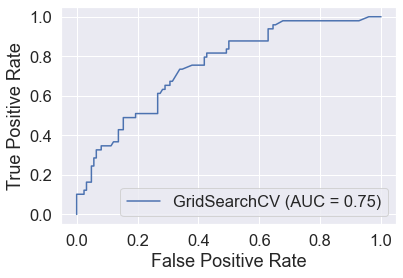

In [2823]:
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test);

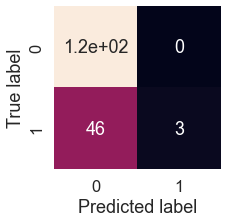

In [2824]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

plot_conf_mat(y_test, y_preds)

In [2825]:

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       124
           1       1.00      0.06      0.12        49

    accuracy                           0.73       173
   macro avg       0.86      0.53      0.48       173
weighted avg       0.81      0.73      0.64       173



### KNN Model

In [2826]:
train_scores = []
test_scores =[]
neighbors = range(1,21)
knn= KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test,y_test))

Maximum KNN Score on the test data: 76.88%


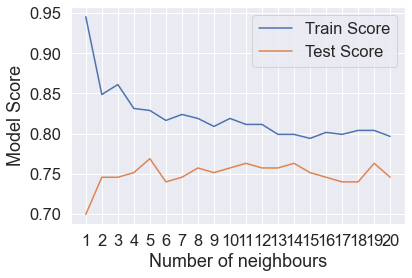

In [2827]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

### Random Forest Model 

In [2834]:
rf_grid = {"n_estimators":np.arange(10,1000, 50),
          "max_depth":[None, 3, 5,10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf":np.arange(1, 20, 2)}
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid, cv=5, n_iter=4, verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [2835]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [2836]:
model_scores

{'Logistic Regression': 0.7456647398843931,
 'KNN': 0.7687861271676301,
 'Random Forest': 0.7341040462427746}

# Conclusion

In Conclusion , we have been able to predict if a person will donate blood in march of 2007 with 75% accuracy due to biased data.